## Corona Prediction Capstone Project
#1. Introduction

Today, with the ongoing evolution of infectious diseases, the world stands at a pivotal juncture where rapid and accurate disease prediction and diagnosis can play a transformative role in the realm of healthcare. The stakes are high, with the COVID-19 pandemic illustrating the immense strain on healthcare systems, the critical importance of early diagnosis, and the life-saving potential of effective screening. As part of this Covid19 Prediction Project we will try to answer the below questions:

**Why is this proposal important in today’s world?**

The world today faces an ever-increasing array of infectious diseases and public health challenges. In such a landscape, our proposal to predict COVID-19 accurately holds significant importance. The accuracy of our predictive model can not only assist in early intervention but also guide the allocation of limited healthcare resources effectively. By answering this question, we underscore the urgency of our project and the potential to save lives through early diagnosis.

**How predicting a disease accurately can improve medical treatment?**

Accurate disease prediction serves as a catalyst for improved medical treatment. Our project seeks to harness data-driven insights to identify individuals at higher risk of contracting COVID-19. By doing so, we enable medical professionals to provide timely and targeted care, thereby enhancing patient outcomes. Early prediction also empowers healthcare systems to proactively allocate resources, including testing, treatment, and quarantine facilities, more efficiently.

**How is it going to impact the medical field when it comes to effective screening and reducing healthcare burden?**

In the current healthcare landscape, overburdened healthcare systems and resource constraints have been starkly exposed by the COVID-19 pandemic. The accuracy of our disease prediction model has far-reaching implications for effective screening and resource allocation. By minimizing false negatives, our model ensures that individuals at risk are identified promptly, reducing the burden on healthcare facilities and preventing the spread of the disease.

**How this proposed method can be helpful if required in the future for any other disease.**

Beyond addressing the immediate crisis of COVID-19, our project aims to bridge the knowledge gap in predictive disease modeling. The methodologies developed here can serve as a valuable blueprint for tackling future diseases, both known and unknown. By advancing the application of data science and machine learning to infectious disease prediction, we set the stage for a more proactive, informed, and resilient healthcare system in the face of future health challenges.

In essence, our proposal not only offers immediate value in the fight against COVID-19 but also paves the way for a more prepared and responsive healthcare ecosystem, capable of adapting to emerging health threats.

#2.Initial Hypotheses

Based on the dataset presented, which contains variables such as Test_date, Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex, and Known_contact, we may construct the following initial hypothesis:

**Symptoms Hypothesis:** It is hypothesized that the presence of specific symptoms such as cough, fever, sore throat, and shortness of breath may be strong indicators of COVID-19 infection. These symptoms are likely to be more prevalent among COVID-19 positive cases compared to COVID-19 negative cases.

**Age Hypothesis:** We hypothesize that age is a significant factor in predicting COVID-19 infection. Individuals aged 60 and above may be at a higher risk of contracting the virus, and this age group might have a higher proportion of positive cases.

**Contact Hypothesis:** Individuals who have had known contact with COVID-19-positive individuals are more likely to test positive for the virus. This hypothesis suggests that the contact variable is a strong predictor of COVID-19 diagnosis.

It is crucial to highlight that these are initial hypotheses based on the available dataset, and further analysis and modeling will be required to test these assumptions and find further insights related to COVID-19 prediction.

#3. Data Cleaning (Data Pre-Processing)





**3.1 Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**3.2 Importing the Corona Data Set**

In [2]:
d = pd.read_csv('/content/drive/MyDrive/odin_datasets/corona_tested_006.csv')
df = d.copy()

<ipython-input-2-a3068ebad08b>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv('/content/drive/MyDrive/odin_datasets/corona_tested_006.csv')


In [3]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
df.shape

(278848, 11)

**Observation:** Dataset includes 11 features (No. of Columns) and 278.8k Records (No. of Rows)

**3.3 Checking features and their Data Types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


**3.4 Checking statistics of each feature:**

In [6]:
df.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3.5 Checking Duplicate Records, null values & unique values of dataset**

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,False,False,False,False,False,False
278844,False,False,False,False,False,False,False,False,False,False,False
278845,False,False,False,False,False,False,False,False,False,False,False
278846,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [10]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

**Observation:**

*   We have 10 Columns of Object Data Type and 1 Column (IND_ID) of Integer Data.
*   We don't have Null value in any of the Columns as per df.info().
*   We don't have any Duplicate records.





**3.6 Droping features which are not relavant for our prediction model**

In [11]:
df = df.drop(['Ind_ID'], axis=1)

**Note:**
Individual ID (Ind_ID): This feature is typically used to uniquely identify individuals in the dataset. It doesn't contribute to the prediction task and can be considered an identifier without any predictive value. Therefore, it can be dropped from the dataset without affecting the model's performance.

In [12]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


**3.7 Checking Unique Values and their value counts**  

In [13]:
for i in df:
  print(df[i].value_counts())

20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
14-03-2020      609


**Observation:**
- In the columns Cough_symptoms , Fever , Sore_throat , Shortness_of_breath and Headache. We have values like TRUE ,True , False , FALSE. So , we need to rename these and make it to True and False only.
- we also have 'None' in data, we need to deal with these missing values.
- we will clean each column separately as per the requirement.

**3.8 cleaning the column Cough_Symptoms**
- Rename FALSE and TRUE as False and True respectively.
- Replace None value with Mode.

In [14]:
df['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [15]:
df['Cough_symptoms'].replace('FALSE',False,inplace=True)
df['Cough_symptoms'].replace('TRUE',True,inplace=True)
df['Cough_symptoms'].replace('None',df['Cough_symptoms'].mode()[0],inplace=True)
df['Cough_symptoms'].unique()

array([ True, False])

**3.9 cleaning the column Fever**
- Rename FALSE and TRUE as False and True respectively.
- Replace None value with Mode.

In [16]:
df['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [17]:
df['Fever'].replace('FALSE',False,inplace=True)
df['Fever'].replace('TRUE',True,inplace=True)
df['Fever'].replace('None',df['Fever'].mode()[0],inplace=True)
df['Fever'].unique()

array([False,  True])

**3.10 cleaning the column Sore_Throat**
- Rename FALSE and TRUE as False and True respectively.
- Replace None value with Mode.

In [18]:
df['Sore_throat'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [19]:
df['Sore_throat'].replace('FALSE',False,inplace=True)
df['Sore_throat'].replace('TRUE',True,inplace=True)
df['Sore_throat'].replace('None',df['Sore_throat'].mode()[0],inplace=True)
df['Sore_throat'].unique()

array([ True, False])

**3.11 cleaning the column Shortness_of_breath**
- Rename FALSE and TRUE as False and True respectively.
- Replace None value with Mode.

In [20]:
df['Shortness_of_breath'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [21]:
df['Shortness_of_breath'].replace('FALSE',False,inplace=True)
df['Shortness_of_breath'].replace('TRUE',True,inplace=True)
df['Shortness_of_breath'].replace('None',df['Shortness_of_breath'].mode()[0],inplace=True)
df['Shortness_of_breath'].unique()

array([False,  True])

**3.12 cleaning the column Headache**
- Rename FALSE and TRUE as False and True respectively.
- Replace None value with Mode.

In [22]:
df['Headache'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [23]:
df['Headache'].replace('FALSE',False,inplace=True)
df['Headache'].replace('TRUE',True,inplace=True)
df['Headache'].replace('None',df['Headache'].mode()[0],inplace=True)
df['Headache'].unique()

array([False,  True])

**3.13 cleaning the column Coron**a
- We have 'Positive', 'Negative', and 'Others' in our dataset for Corona test result.
- We need to build a model to predict if patient is Corona 'Positive' or 'Negative', we don't need to train our model for 'Others' condition, so we can drop the records having 'Others' as outcome.

In [24]:
df['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [25]:
df = df[df['Corona'] != 'other']
df['Corona'].unique()

array(['negative', 'positive'], dtype=object)

**3.14 cleaning the feature Age_60_above**
- We have 'No', 'Yes', and 'None' in our dataset for Age 60 above feature.
- Approximate 45% of data is 'None', but as Age is an important factor for Corona testing as generally patient above 60 Age have more chances to be affected by Corona, we will retain this feature in our model and will replace 'None' by 'No'.

In [26]:
df['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [27]:
df['Age_60_above'].replace('None','No',inplace=True)
df['Age_60_above'].unique()

array(['No', 'Yes'], dtype=object)

**3.15 cleaning the feature Sex**
- We have 'female', 'male', and 'None' in our dataset for Sex feature.
- Replace None value with Mode.

In [28]:
df['Sex'].unique()

array(['None', 'male', 'female'], dtype=object)

In [29]:
df['Sex'].replace('None',df['Sex'].mode()[0],inplace=True)
df['Sex'].unique()

array(['female', 'male'], dtype=object)

**3.16 checking the feature Known_contact**
- This feature doesn't have any missing value. So it does not need any modification.

In [30]:
df['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

converting Test_date dtype from object to datetime64

In [31]:
df['Test_date']=pd.to_datetime(df['Test_date'], format="%d-%m-%Y")

**3.17 Checking the dataset again after cleaning all the features**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274956 non-null  datetime64[ns]
 1   Cough_symptoms       274956 non-null  bool          
 2   Fever                274956 non-null  bool          
 3   Sore_throat          274956 non-null  bool          
 4   Shortness_of_breath  274956 non-null  bool          
 5   Headache             274956 non-null  bool          
 6   Corona               274956 non-null  object        
 7   Age_60_above         274956 non-null  object        
 8   Sex                  274956 non-null  object        
 9   Known_contact        274956 non-null  object        
dtypes: bool(5), datetime64[ns](1), object(4)
memory usage: 13.9+ MB


##4. Exploratory Data Analysis


**4.1 Checking distribution of corona variable which is our target variable**

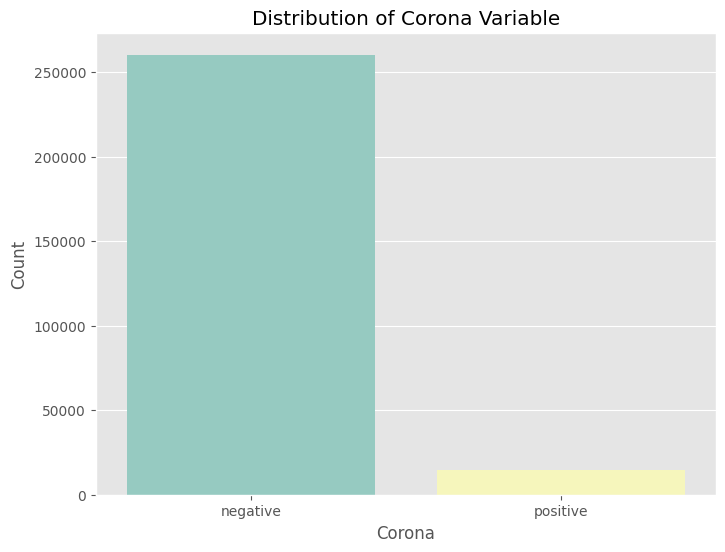

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=[8, 6])

sns.countplot(data=df, x='Corona', palette='Set3')

plt.title("Distribution of Corona Variable")
plt.xlabel("Corona")
plt.ylabel("Count")
plt.show()

**4.2 Checking exact Corona Positive to Corona negative ratio**

In [34]:
ratio = df['Corona'].value_counts(normalize=True)['negative'] / df['Corona'].value_counts(normalize=True)['positive']
ratio

17.667662434652726

**Note:** 1 in every 17 patients is corona positive.


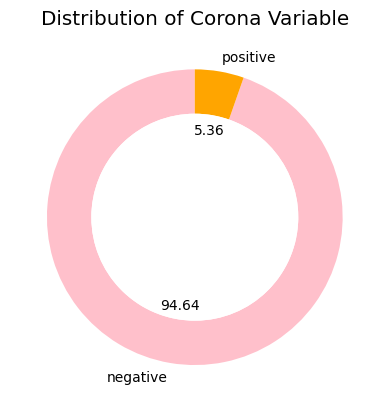

In [35]:
colors = ['pink', 'orange']

corona_counts = df['Corona'].value_counts()

plt.pie(corona_counts, labels=corona_counts.index, autopct="%0.2f", colors=colors, wedgeprops=dict(width=0.3), startangle=90)

# To draw a white circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Corona Variable")
plt.show()

**4.3 Encoding Target Variable(Corona)**

In [36]:
df['Corona'] = df['Corona'].map({'negative' : 0 , 'positive' : 1})

**4.4 Creating new dataframe with Corona value**

In [37]:
df_positive = df[df['Corona'] == 1]
df_negative = df[df['Corona'] == 0]


In [38]:
df_positive.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
1,2020-03-11,False,True,False,False,False,1,No,female,Abroad
2,2020-03-11,False,True,False,False,False,1,No,female,Abroad
43,2020-03-11,False,False,False,False,False,1,No,female,Abroad
45,2020-03-11,True,False,False,False,False,1,No,female,Abroad
47,2020-03-11,False,False,False,False,False,1,No,female,Abroad


**4.5 Univariate Analysis**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274956 non-null  datetime64[ns]
 1   Cough_symptoms       274956 non-null  bool          
 2   Fever                274956 non-null  bool          
 3   Sore_throat          274956 non-null  bool          
 4   Shortness_of_breath  274956 non-null  bool          
 5   Headache             274956 non-null  bool          
 6   Corona               274956 non-null  int64         
 7   Age_60_above         274956 non-null  object        
 8   Sex                  274956 non-null  object        
 9   Known_contact        274956 non-null  object        
dtypes: bool(5), datetime64[ns](1), int64(1), object(3)
memory usage: 13.9+ MB


 **4.6 creating a list containing the column names from the DataFrame df where the data type is either "object" or "bool"**

In [40]:
categorical_and_boolean_columns = list(df.select_dtypes(include=['object', 'bool']).columns)
categorical_and_boolean_columns

['Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Age_60_above',
 'Sex',
 'Known_contact']

In [41]:
for column in categorical_and_boolean_columns :
    print(f"--------------------------------------------------")
    print(f"{column} for patients with Corona positive")
    print(df[df['Corona'] == 1][column].value_counts().sort_values(ascending=False))

    print(f"\n{column} for patients with Corona negative")
    print(df[df['Corona'] == 0][column].value_counts().sort_values(ascending=False))

--------------------------------------------------
Cough_symptoms for patients with Corona positive
False    8145
True     6584
Name: Cough_symptoms, dtype: int64

Cough_symptoms for patients with Corona negative
False    225240
True      34987
Name: Cough_symptoms, dtype: int64
--------------------------------------------------
Fever for patients with Corona positive
False    9170
True     5559
Name: Fever, dtype: int64

Fever for patients with Corona negative
False    244411
True      15816
Name: Fever, dtype: int64
--------------------------------------------------
Sore_throat for patients with Corona positive
False    13203
True      1526
Name: Sore_throat, dtype: int64

Sore_throat for patients with Corona negative
False    259861
True        366
Name: Sore_throat, dtype: int64
--------------------------------------------------
Shortness_of_breath for patients with Corona positive
False    13565
True      1164
Name: Shortness_of_breath, dtype: int64

Shortness_of_breath for patien

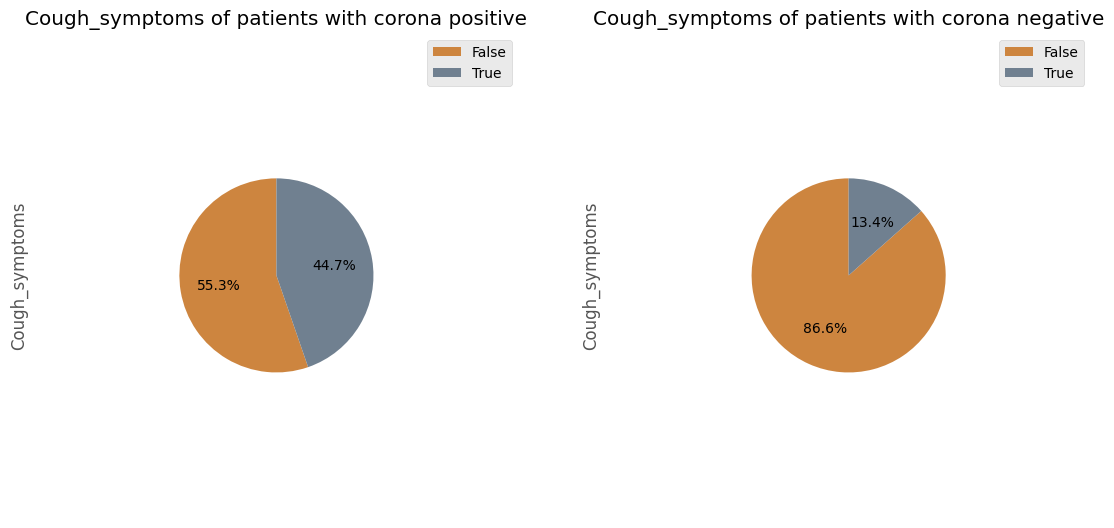

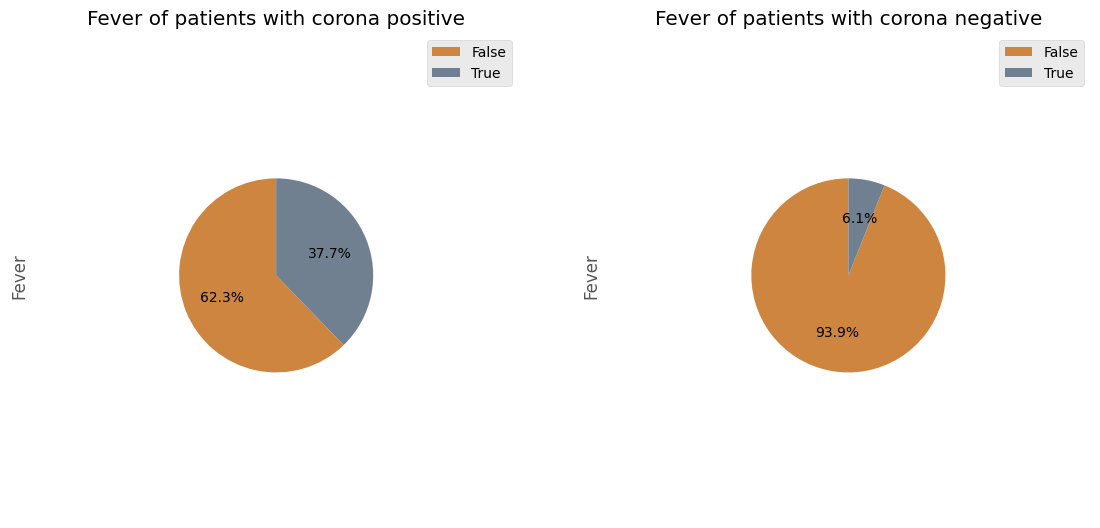

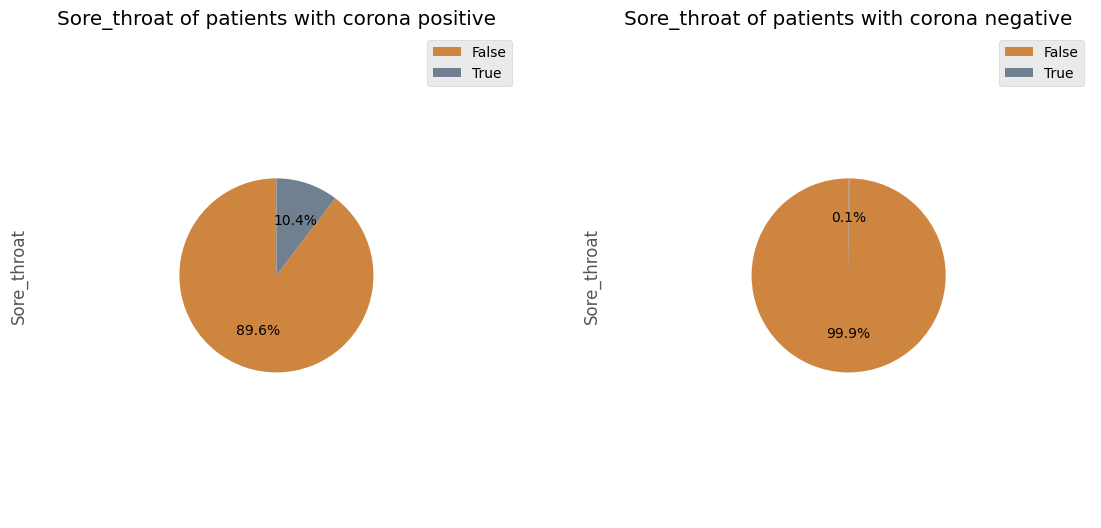

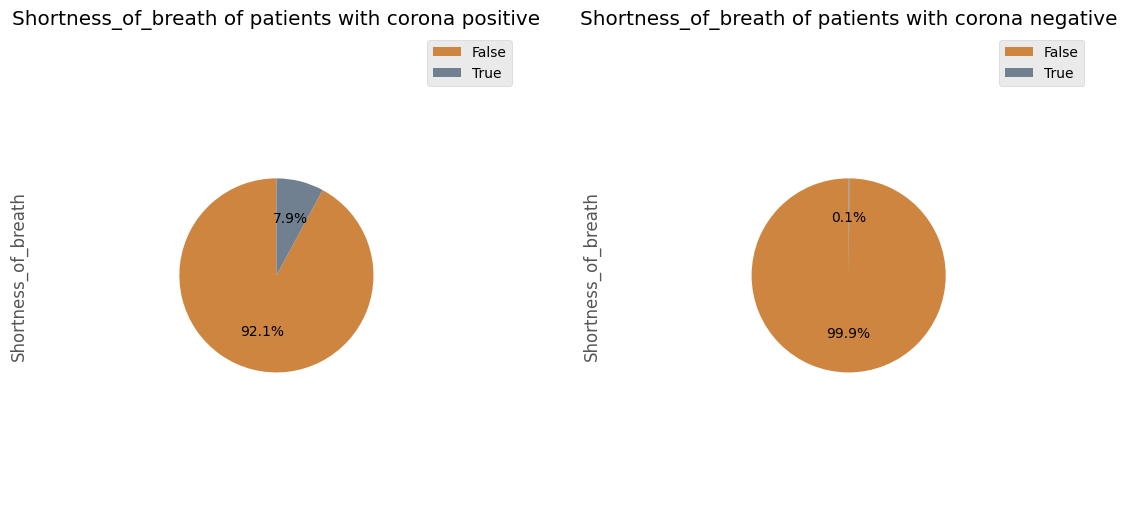

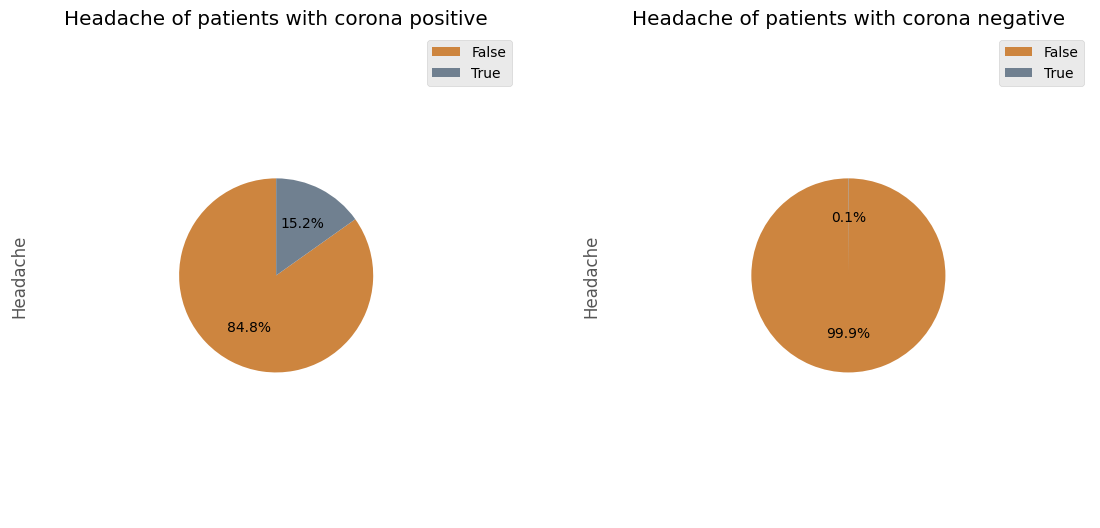

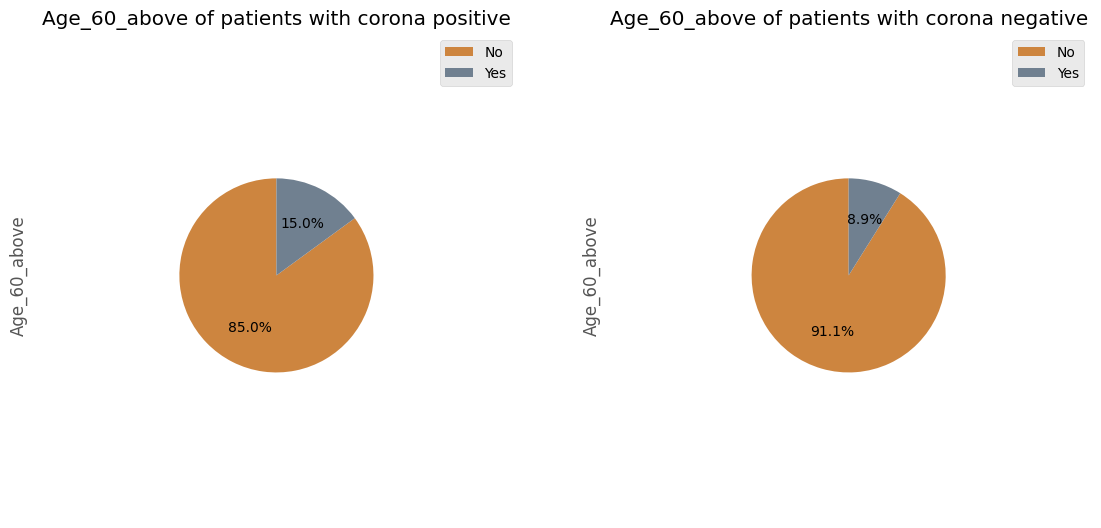

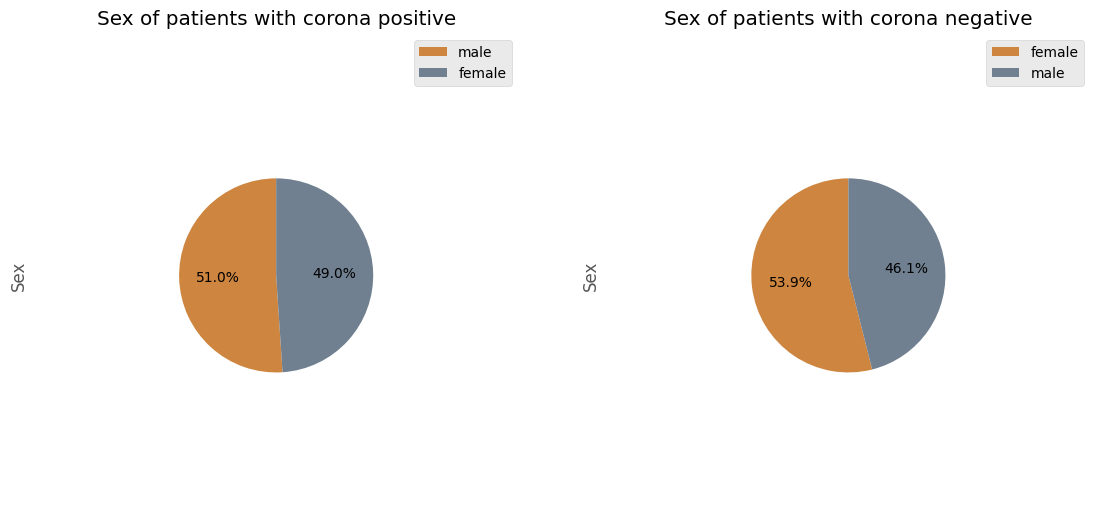

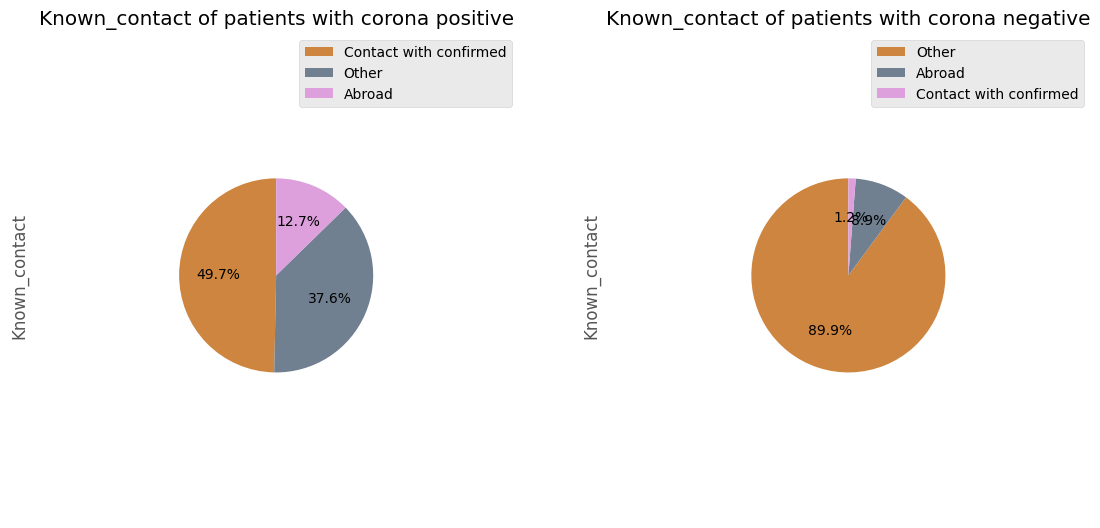

In [42]:
p_plot = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

for symptom in p_plot:
    plt.style.use('ggplot')
    fig, axes = plt.subplots(1, 2, figsize=[12, 6])

    # for patients with corona positive
    df_positive[symptom].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, radius=0.5, colors=['peru','slategrey','plum'], labeldistance=None, ax=axes[0])
    axes[0].set_title(f'{symptom} of patients with corona positive')
    axes[0].legend()

    # for patients with corona negative
    df_negative[symptom].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, radius=0.5, colors=['peru','slategrey','plum'], labeldistance=None, ax=axes[1])
    axes[1].set_title(f'{symptom} of patients with corona negative')
    axes[1].legend()

    plt.tight_layout(pad=4)
    plt.show()

**Observation:**
Cough_Symptoms and Fever are the most common symptoms among Corona positive patients.
Patients with corona negative report almost do not have any sore throat problems.
Corona negative people do not have any shortness of breath.
Corona negative people also do not have any headaches.
Patients age is also an important factor to consider.
Sex of patients does not have any considerable effect.
Almost 50% of Corona Positive patients have Known_Contact with confirmed.



**4.7 Creating heatmap of the correlation matrix**

<ipython-input-43-182fd031f822>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


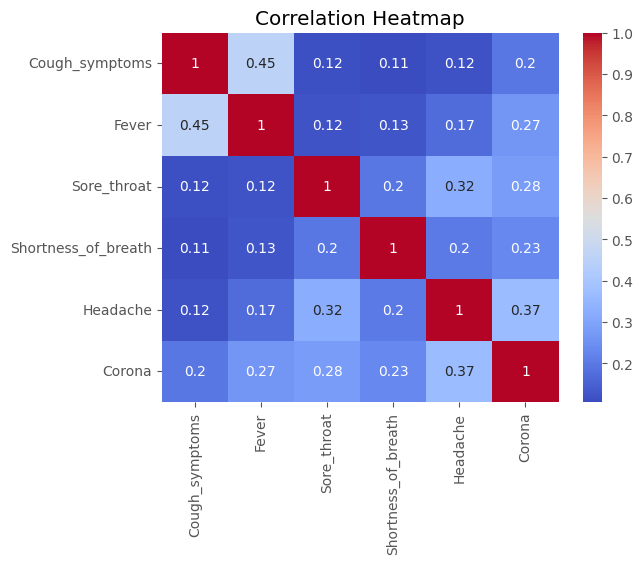

In [43]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observation:**
As per the Heatmap "Age_60_above" and "Sex" don't have much impact on Dependent Feature "Corona". These features can be removed from Data Set as they are not much relevant, but we will keep them as of now in DataSet for building up the Model.

# **5 Feature Engineering:**

it is the process of creating new features or modifying existing ones to improve the performance of a machine learning model. It involves transforming raw data into a format that better represents the underlying problem and helps the model make more accurate predictions.

In [44]:
df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,0,No,female,Abroad
1,2020-03-11,False,True,False,False,False,1,No,female,Abroad
2,2020-03-11,False,True,False,False,False,1,No,female,Abroad
3,2020-03-11,True,False,False,False,False,0,No,female,Abroad
4,2020-03-11,True,False,False,False,False,0,No,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,1,No,male,Other
278844,2020-04-30,False,False,False,False,False,0,No,female,Other
278845,2020-04-30,False,False,False,False,False,0,No,male,Other
278846,2020-04-30,False,False,False,False,False,0,No,male,Other


 In our dataset, the columns are currently represented in object and boolean data types. To facilitate model building, it's imperative to convert these columns into numerical formats, as most machine learning models exclusively understand numerical inputs.


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274956 non-null  datetime64[ns]
 1   Cough_symptoms       274956 non-null  bool          
 2   Fever                274956 non-null  bool          
 3   Sore_throat          274956 non-null  bool          
 4   Shortness_of_breath  274956 non-null  bool          
 5   Headache             274956 non-null  bool          
 6   Corona               274956 non-null  int64         
 7   Age_60_above         274956 non-null  object        
 8   Sex                  274956 non-null  object        
 9   Known_contact        274956 non-null  object        
dtypes: bool(5), datetime64[ns](1), int64(1), object(3)
memory usage: 13.9+ MB



**5.1 Retrieving Distinct Values for Features**

In [46]:
unique_values = {
    'Cough Symptoms': df['Cough_symptoms'].unique(),
    'Fever': df['Fever'].unique(),
    'Sore Throat': df['Sore_throat'].unique(),
    'Shortness of Breath': df['Shortness_of_breath'].unique(),
    'Headache': df['Headache'].unique(),
    'Age 60 and Above': df['Age_60_above'].unique(),
    'Sex': df['Sex'].unique(),
    'Known Contact': df['Known_contact'].unique()
}

for feature, values in unique_values.items():
    print(f"{feature}: {values}")

Cough Symptoms: [ True False]
Fever: [False  True]
Sore Throat: [ True False]
Shortness of Breath: [False  True]
Headache: [False  True]
Age 60 and Above: ['No' 'Yes']
Sex: ['female' 'male']
Known Contact: ['Abroad' 'Contact with confirmed' 'Other']


**5.2 Encoding Independent variables using Label Encoder**

In [47]:
from sklearn.preprocessing import LabelEncoder

# Defining the categorical columns for label encoding
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# Initializing LabelEncoder and apply it to the specified columns
label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

# Displaying the DataFrame after label encoding
print("Encoded Categorical Columns:")
print(df.tail())

Encoded Categorical Columns:
        Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
278843 2020-04-30               0      0            0                    0   
278844 2020-04-30               0      0            0                    0   
278845 2020-04-30               0      0            0                    0   
278846 2020-04-30               0      0            0                    0   
278847 2020-04-30               0      0            0                    0   

        Headache  Corona  Age_60_above  Sex  Known_contact  
278843         0       1             0    1              2  
278844         0       0             0    0              2  
278845         0       0             0    1              2  
278846         0       0             0    1              2  
278847         0       0             0    0              2  


In [48]:
df.nunique()

Test_date              51
Cough_symptoms          2
Fever                   2
Sore_throat             2
Shortness_of_breath     2
Headache                2
Corona                  2
Age_60_above            2
Sex                     2
Known_contact           3
dtype: int64

**5.3 Train/Test Split based on date**

In alignment with our business requirements, we will utilize data spanning from March 11, 2020, to April 15, 2020, for the creation of our Training Set and Validation Set. Subsequently, the data extracted from April 16 to April 30, 2020, will be designated as our Test Set.







In [49]:
# Splitting Data Based on Date

break_date = pd.Timestamp("2020-04-15")

# Training and Validation Set
df_train_valid = df[df["Test_date"] <= break_date]

# Test Set
df_test = df[df["Test_date"] > break_date]

In [50]:
df_train_valid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,0,0,0,0
1,2020-03-11,0,1,0,0,0,1,0,0,0
2,2020-03-11,0,1,0,0,0,1,0,0,0
3,2020-03-11,1,0,0,0,0,0,0,0,0
4,2020-03-11,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
163184,2020-04-15,0,0,0,0,0,0,0,1,2
163185,2020-04-15,0,0,0,0,0,0,0,1,2
163186,2020-04-15,0,0,0,0,0,0,0,0,2
163187,2020-04-15,0,0,0,0,0,0,0,1,2


In [51]:
df_test

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,2020-04-16,1,0,0,0,0,0,0,0,0
163190,2020-04-16,0,0,0,0,0,0,0,0,2
163191,2020-04-16,1,0,0,0,0,0,0,0,0
163192,2020-04-16,0,0,0,0,0,0,0,1,2
163193,2020-04-16,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,0,0,0,0,0,1,0,1,2
278844,2020-04-30,0,0,0,0,0,0,0,0,2
278845,2020-04-30,0,0,0,0,0,0,0,1,2
278846,2020-04-30,0,0,0,0,0,0,0,1,2


**5.4 Separating Dataset into Training Set , Test Set and Validation Set**

In [52]:
# Creating Feature Set X_train by Excluding Unnecessary Columns
columns_to_exclude = ['Test_date', 'Corona']
X_train = df_train_valid.drop(columns=columns_to_exclude, axis=1)
X_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
163184,0,0,0,0,0,0,1,2
163185,0,0,0,0,0,0,1,2
163186,0,0,0,0,0,0,0,2
163187,0,0,0,0,0,0,1,2


In [53]:
# Creating Target Variable y_train
y_train = df_train_valid['Corona']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 160717, dtype: int64

In [54]:
# Creating Feature Set X_test by Excluding Unnecessary Columns
columns_to_exclude = ['Test_date', 'Corona']
X_test = df_test.drop(columns=columns_to_exclude, axis=1)
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
163189,1,0,0,0,0,0,0,0
163190,0,0,0,0,0,0,0,2
163191,1,0,0,0,0,0,0,0
163192,0,0,0,0,0,0,1,2
163193,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,1,2
278844,0,0,0,0,0,0,0,2
278845,0,0,0,0,0,0,1,2
278846,0,0,0,0,0,0,1,2


In [55]:
# Creating Target Variable y_test
y_test = df_test['Corona']
print(y_test)

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 114239, dtype: int64


In [56]:
# Splitting Training Set into Training and Validation Sets (80% training, 20% validation)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [57]:
# Training Set
print(f"Training Set: X_train shape - {X_train.shape}, y_train shape - {y_train.shape}")

# Test Set
print(f"Test Set: X_test shape - {X_test.shape}, y_test shape - {y_test.shape}")

# Validation Set
print(f"Validation Set: X_val shape - {X_val.shape}, y_val shape - {y_val.shape}")

Training Set: X_train shape - (128573, 8), y_train shape - (128573,)
Test Set: X_test shape - (114239, 8), y_test shape - (114239,)
Validation Set: X_val shape - (32144, 8), y_val shape - (32144,)


**5.5 Feature Scaling**

It involves transforming the features (variables) of a dataset into a standardized range. The goal is to ensure that all features contribute equally to the computation of distances, similarities, and gradients during the training of machine learning models.

Feature scaling is particularly important when features have different units or scales, as it helps prevent certain features from dominating the learning process.

In [58]:
# Standardizing the Training Set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled

array([[-0.46653095, -0.31927699, -0.10941424, ..., -0.43237931,
         1.10184642,  0.41636398],
       [-0.46653095, -0.31927699, -0.10941424, ...,  2.31278413,
        -0.9075675 ,  0.41636398],
       [-0.46653095, -0.31927699, -0.10941424, ..., -0.43237931,
        -0.9075675 ,  0.41636398],
       ...,
       [-0.46653095, -0.31927699, -0.10941424, ..., -0.43237931,
        -0.9075675 ,  0.41636398],
       [-0.46653095, -0.31927699, -0.10941424, ...,  2.31278413,
         1.10184642,  0.41636398],
       [-0.46653095, -0.31927699, -0.10941424, ..., -0.43237931,
        -0.9075675 ,  0.41636398]])

In [59]:
X_test_scaled = sc.transform(X_test)
X_test_scaled

array([[ 2.14348052, -0.31927699, -0.10941424, ..., -0.43237931,
        -0.9075675 , -2.71157816],
       [-0.46653095, -0.31927699, -0.10941424, ..., -0.43237931,
        -0.9075675 ,  0.41636398],
       [ 2.14348052, -0.31927699, -0.10941424, ..., -0.43237931,
        -0.9075675 , -2.71157816],
       ...,
       [-0.46653095, -0.31927699, -0.10941424, ..., -0.43237931,
         1.10184642,  0.41636398],
       [-0.46653095, -0.31927699, -0.10941424, ..., -0.43237931,
         1.10184642,  0.41636398],
       [-0.46653095, -0.31927699, -0.10941424, ..., -0.43237931,
        -0.9075675 ,  0.41636398]])

# **6 Building the Algorithm**

**6.1 Logistic Regression**

In [60]:
# Importing Logistic Regression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression model
lr = LogisticRegression(random_state=0)

# Training the model with the training data
lr.fit(X_train, y_train)

# Printing and Describing the Logistic Regression Model
print("Logistic Regression Model trained successfully.")

Logistic Regression Model trained successfully.


 **6.2 k-Nearest Neighbors(KNN)**

In [61]:
# Importing KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Creating a KNeighborsClassifier (KNN) model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Training the model with the training data
knn.fit(X_train, y_train)

# Printing and Describing the KNeighborsClassifier (KNN) Model
print("KNeighborsClassifier (KNN) Model trained successfully.")

KNeighborsClassifier (KNN) Model trained successfully.


**6.3 Decision Tree**

In [62]:
# Importing Decision Tree Classifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Creating a Decision Tree Classifier object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Training the Decision Tree Classifier
dt.fit(X_train, y_train)

# Printing and Describing the Decision Tree Classifier Model
print("Decision Tree Classifier Model trained successfully.")

Decision Tree Classifier Model trained successfully.


**6.4 Random Forest**

In [63]:
# Importing Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=10, criterion="entropy")

# Training the Random Forest Classifier
rf.fit(X_train, y_train)

# Printing and Describing the Random Forest Classifier Model
print("Random Forest Classifier Model trained successfully.")

Random Forest Classifier Model trained successfully.


# 7 Generating Prediction

**7.1 Generating predictions on the test set using Logistic Regression:**

In [64]:
lr_pred=lr.predict(X_test)

**7.2 Generating predictions on the test set using KNN:**

In [65]:
knn_pred=knn.predict(X_test)

**7.3 Generating predictions on the test set using Decison Tree:**

In [66]:
dt_pred=dt.predict(X_test)

**7.4 Generating predictions on the test set using Random Forest:**

In [67]:
rf_pred=rf.predict(X_test)

# 8 Model Evaluation

**8.1 Logistic Regression**

Accuracy: 0.9761990213499768
Precision Score: 0.2558139534883721
Confusion Matrix:
[[111509     32]
 [  2687     11]]


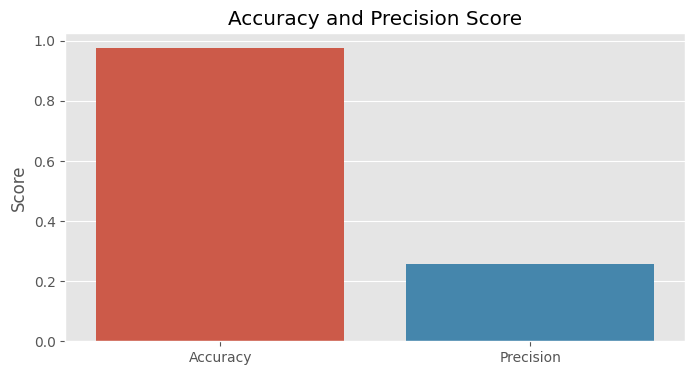

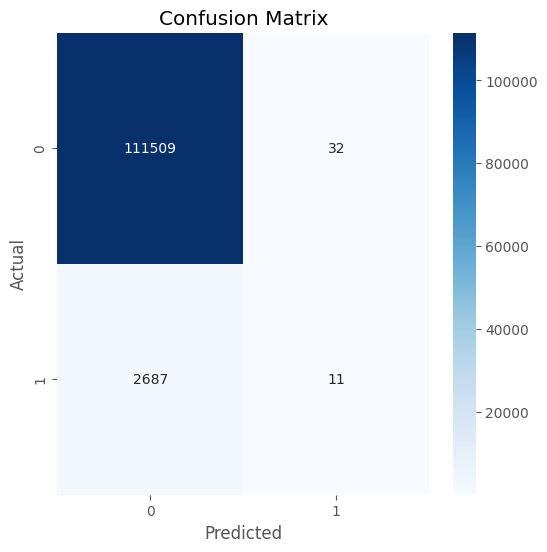

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.26      0.00      0.01      2698

    accuracy                           0.98    114239
   macro avg       0.62      0.50      0.50    114239
weighted avg       0.96      0.98      0.96    114239



In [68]:
# Importing necessary metrics and visualization libraries
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Calculating accuracy
accuracy_lr = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy_lr)

# Calculating precision score
lr_precision = precision_score(y_test, lr_pred, zero_division=0)
print("Precision Score:", lr_precision)

# Generating confusion matrix
lr_confusion_matrix = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:")
print(lr_confusion_matrix)

# Generating classification report
lr_classification_report = classification_report(y_test, lr_pred, zero_division=0)

# Plotting bar chart for Accuracy and Precision
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_lr, 'Precision': lr_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

# Plotting heatmap for Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Displaying Classification Report
print("Classification Report:")
print(lr_classification_report)

**8.2 KNN**

Accuracy: 0.9847775278144941
Precision Score: 0.7719795802609188
Confusion Matrix:
[[111139    402]
 [  1337   1361]]


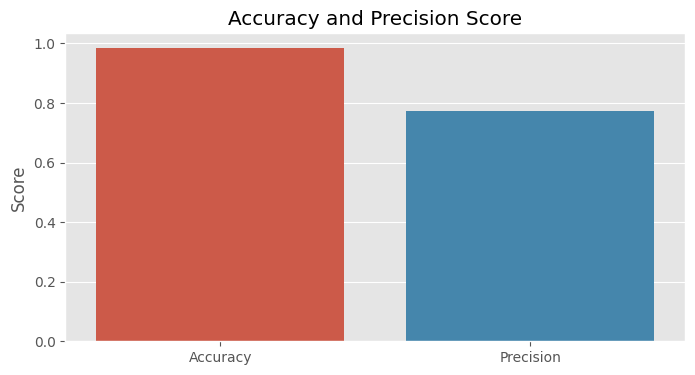

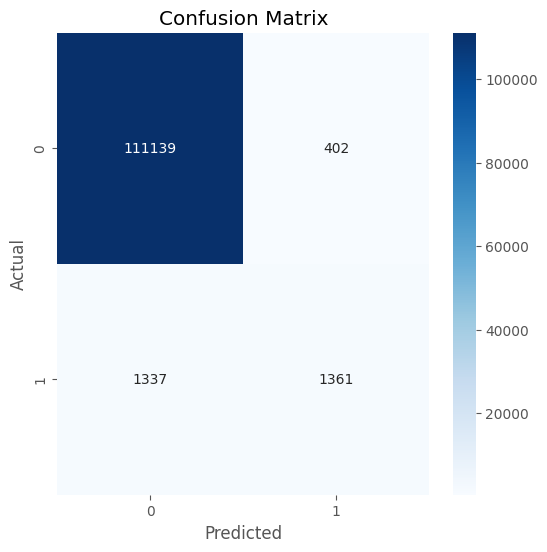

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.77      0.50      0.61      2698

    accuracy                           0.98    114239
   macro avg       0.88      0.75      0.80    114239
weighted avg       0.98      0.98      0.98    114239



In [69]:
# Importing necessary metrics and visualization libraries
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Calculating accuracy
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy_knn)

# Calculating precision score
knn_precision = precision_score(y_test, knn_pred, zero_division=0)
print("Precision Score:", knn_precision)

# Generating confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:")
print(knn_confusion_matrix)

# Generating classification report
knn_classification_report = classification_report(y_test, knn_pred, zero_division=0)

# Plotting bar chart for Accuracy and Precision
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_knn, 'Precision': knn_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

# Plotting heatmap for Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Displaying Classification Report
print("Classification Report:")
print(knn_classification_report)

**8.3 Decision Tree**

Accuracy: 0.9854165390103204
Precision Score: 0.7587763289869609
Confusion Matrix:
[[111060    481]
 [  1185   1513]]


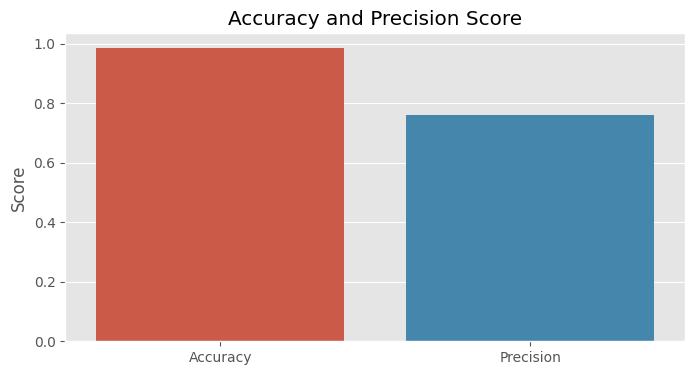

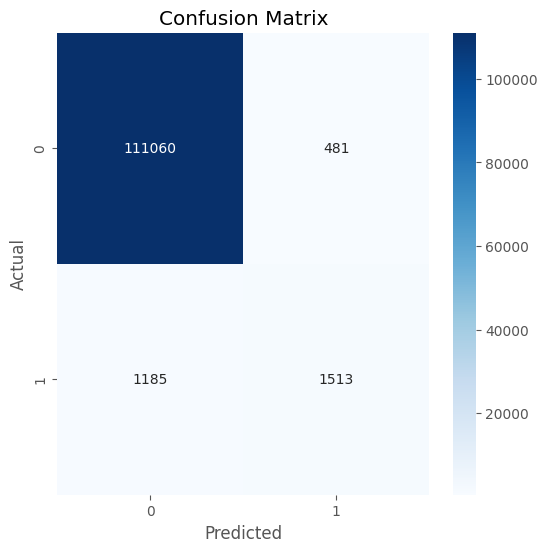

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.76      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.87      0.78      0.82    114239
weighted avg       0.98      0.99      0.98    114239



In [70]:
# Importing necessary metrics and visualization libraries
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy_dt)

# Calculating precision score
dt_precision = precision_score(y_test, dt_pred, zero_division=0)
print("Precision Score:", dt_precision)

# Generating confusion matrix
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:")
print(dt_confusion_matrix)

# Generating classification report
dt_classification_report = classification_report(y_test, dt_pred, zero_division=0)

# Plotting bar chart for Accuracy and Precision
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_dt, 'Precision': dt_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

# Plotting heatmap for Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Displaying Classification Report
print("Classification Report:")
print(dt_classification_report)

**8.4 Random Forest**

Accuracy: 0.9837796199196421
Precision Score: 0.7807308970099668
Confusion Matrix:
[[111211    330]
 [  1523   1175]]


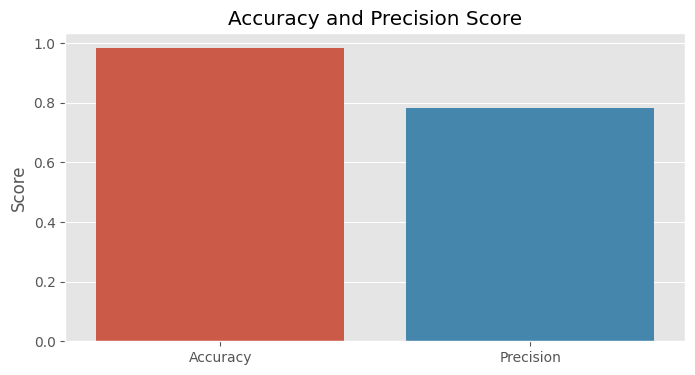

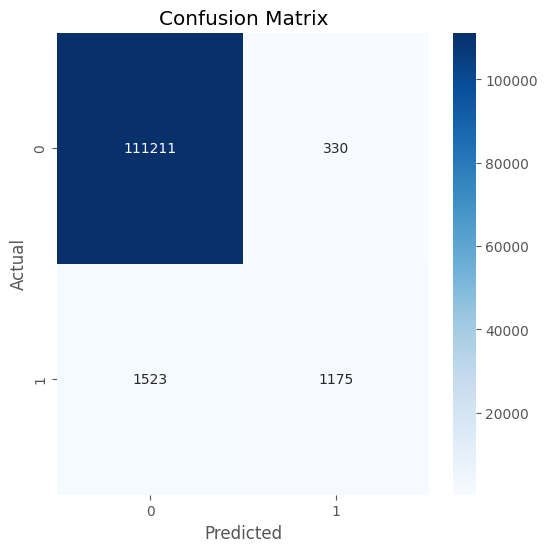

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.78      0.44      0.56      2698

    accuracy                           0.98    114239
   macro avg       0.88      0.72      0.78    114239
weighted avg       0.98      0.98      0.98    114239



In [71]:
# Importing necessary metrics and visualization libraries
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy_rf)

# Calculating precision score
rf_precision = precision_score(y_test, rf_pred, zero_division=0)
print("Precision Score:", rf_precision)

# Generating confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(rf_confusion_matrix)

# Generating classification report
rf_classification_report = classification_report(y_test, rf_pred, zero_division=0)

# Plotting bar chart for Accuracy and Precision
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_rf, 'Precision': rf_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

# Plotting heatmap for Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Displaying Classification Report
print("Classification Report:")
print(rf_classification_report)

# **9 Conclusion**


After a comprehensive analysis of the four models, each showcasing impressive performance metrics, the choice for the best model depends on the specific requirements and priorities of the deployment scenario.

**Logistic Regression Model:**

Accuracy: 97.62%

Precision Score: 25.58%

While achieving a reasonable accuracy, the Logistic Regression Model exhibits a relatively lower precision score, suggesting a moderate ability to correctly identify positive cases.

**KNN Model:**

Accuracy: 98.48%

Precision Score: 77.20%

The KNN Model emerges as a strong contender, surpassing others with an accuracy of 98.48% and a robust precision score of 77.20%. Its balanced performance is evident from the well-distributed confusion matrix.

**Decision Tree Model:**

Accuracy: 98.54%

Precision Score: 75.88%

The Decision Tree Model demonstrates remarkable accuracy and precision, with a balanced confusion matrix similar to KNN. Its ability to correctly identify positive cases is notably strong.

**Random Forest Model:**

Accuracy: 98.38%

Precision Score: 77.97%

The Random Forest Model showcases outstanding accuracy and precision, making it a robust choice for deployment. The well-balanced confusion matrix further emphasizes its proficiency in distinguishing between positive and negative instances.

Considering the overall performance, the KNN and Decision Tree models stand out as strong candidates, each excelling in specific aspects. The final decision should be made based on the specific priorities of the deployment, such as the importance of precision, overall accuracy, or other considerations.

# **10 SQL queries in pymysql:**

In [72]:
#Query 1: Number of corona patients who faced shortness of breath
num_shortness_of_breath = df[df['Shortness_of_breath'] == 1]['Corona'].sum()
print(f"Number of corona patients who faced shortness of breath: {num_shortness_of_breath}")


Number of corona patients who faced shortness of breath: 1164


In [73]:
#Query 2: Number of negative corona patients with fever and sore throat
num_negative_with_fever_sore_throat = df[(df['Corona'] == 0) & (df['Fever'] == 1) & (df['Sore_throat'] == 1)].shape[0]
print(f"Number of negative corona patients with fever and sore throat: {num_negative_with_fever_sore_throat}")

Number of negative corona patients with fever and sore throat: 121


In [74]:
#Query 3: Grouped data by month, ranking the number of positive cases
df['Month'] = df['Test_date'].dt.to_period('M')
grouped_data = df[df['Corona'] == 1].groupby('Month').size().reset_index(name='Positive_Cases')
ranked_positive_cases = grouped_data.sort_values(by='Positive_Cases', ascending=False)
print("Grouped data by month, ranking the number of positive cases:")
print(ranked_positive_cases)


Grouped data by month, ranking the number of positive cases:
     Month  Positive_Cases
1  2020-04            8881
0  2020-03            5848


In [75]:
#Query 4: Female negative corona patients with cough and headache
female_negative_with_cough_headache = df[(df['Sex'] == 0) & (df['Corona'] == 0) & (df['Cough_symptoms'] == 1) & (df['Headache'] == 1)].shape[0]
print(f"Female negative corona patients with cough and headache: {female_negative_with_cough_headache}")

Female negative corona patients with cough and headache: 60


In [76]:
#Query 5: Number of elderly corona patients facing breathing problems
elderly_breathing_problems = df[(df['Age_60_above'] == 1) & (df['Corona'] == 1) & (df['Shortness_of_breath'] == 1)].shape[0]
print(f"Number of elderly corona patients facing breathing problems: {elderly_breathing_problems}")

Number of elderly corona patients facing breathing problems: 263


In [77]:
#Query 6: Three most common symptoms among COVID positive patients
most_common_symptoms_positive = df[df['Corona'] == 1][['Cough_symptoms', 'Fever', 'Sore_throat']].sum().nlargest(3).index.tolist()
print(f"Three most common symptoms among COVID positive patients: {most_common_symptoms_positive}")

Three most common symptoms among COVID positive patients: ['Cough_symptoms', 'Fever', 'Sore_throat']


In [78]:
#Query 7: Less common symptom among COVID negative individuals
less_common_symptom_negative = df[df['Corona'] == 0][['Cough_symptoms', 'Fever', 'Sore_throat']].sum().nsmallest(1).index.tolist()
print(f"Less common symptom among COVID negative individuals: {less_common_symptom_negative}")

Less common symptom among COVID negative individuals: ['Sore_throat']


In [79]:
# Query8: Most common symptoms among COVID positive males with a known contact abroad
most_common_symptoms_male_abroad = df[(df['Corona'] == 1) & (df['Sex'] == 1) & (df['Known_contact'] == 1)][['Cough_symptoms', 'Fever', 'Sore_throat']].sum().nlargest(1).index.tolist()
print(f"Most common symptoms among COVID positive males with a known contact abroad: {most_common_symptoms_male_abroad}")

Most common symptoms among COVID positive males with a known contact abroad: ['Cough_symptoms']
